# API Tutorial - OCR-Deidentification

<a target="_blank" href="https://colab.research.google.com/github/ai-amplified/models/blob/main/tutorials/OCR-Deidentification.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Short Description
The OCR Deidentification model is a powerful model that takes data records as images and deidentifies any Protected Health Information (PHI) in the document. The model leverages sophisticated computer vision and natural language processing algorithms to accurately identify and remove PHI information in accordance with HIPAA regulations. It automatically detects typed and printed text, converts it into machine-encoded text, and then uses the `nlp-health-deidentification-sub-base-en` model which is trained in a custom dataset to identify PHI entities and identifies the relevant information. This allows users to quickly and accurately remove PHI from their documents while ensuring compliance with HIPAA regulations.

## Tutorial
This tutorial will guide you through using the OCR-Deidentification API. By following the steps below, you'll be able to extract, conceal, and anonymize Protected Health Information (PHI) from images using the API. The main steps involved are:

1. Creating an access token
2. Installing the aimped library
3. Running the API with your credentials and payload

## Step 1: Create Access Token

To use the API, you need an access token. Follow these steps to create one:

1. Go to the [API Access Token Creation Page](https://aimped.ai/a3m/#/tokens). You will land here:
![Token Creation Page](images/token_11.png)

2. Select scopes and click on "Create Token".
3. After clicking this button, you will see the pop-up from where you can copy the User Key and User Secret.

![Token Creation Page2](images/token_22.png)

3. Copy the generated access tokens and keep it safe. You'll need it for the next steps.

## Step 2: Install aimped Library
To interact with the API, you need to install the aimped Python library. Open your terminal or command prompt and run the following command:

In [2]:
!pip install aimped==0.2.2 pillow

This command will install the necessary library to communicate with the API.

## Step 3: Run the API
Now that you have your access tokens and the library installed, you can run the API for OCR-Deidentification. Follow these steps:

### Set up your credentials:

In [3]:
user_key = "YOUR_USER_KEY"
user_secret = "YOUR_USER_SECRET"

### Import the AimpedAPI class and set the base URL and model ID:
For using different Models and Languages, you just need to change the **Model ID**. The Model ID can be found under "API Information" in the "API Details" tab on each model card.

In [15]:
from aimped.services.api import AimpedAPI

BASE_URL = 'https://aimped.ai'
model_id = "134" # the Model ID can be found under "API Information" in the "API Details" tab on each model card.

### Initialize the API service:

In [16]:
api_service = AimpedAPI(user_key, user_secret, {"base_url": BASE_URL})

### Input Image
Let's see the input image before ocr-deidentification

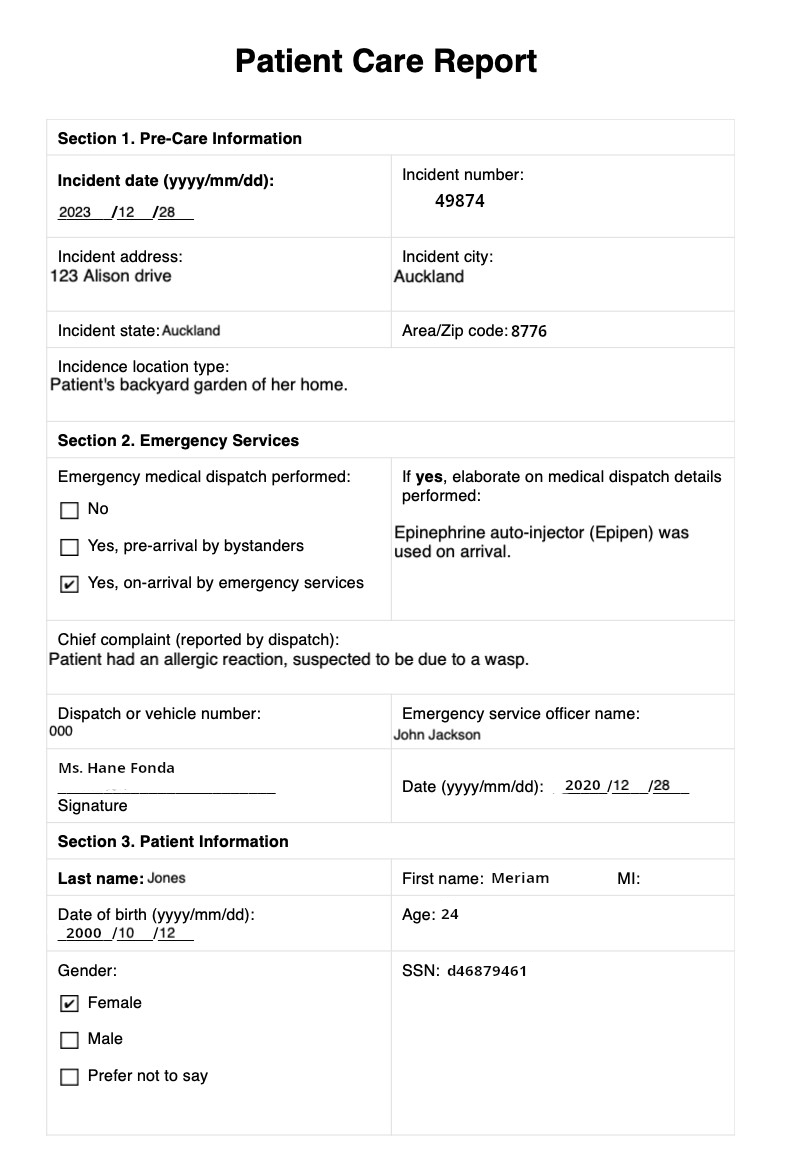

In [1]:
from PIL import Image
from IPython.display import display

# Open an input image file
image = Image.open('images/input_ocr_deid.jpg')  # Replace with the path to your image file

# Display the input image
display(image)

### Define your payload:
Define payload according to your input data type.

In [20]:
path_uri_obj = api_service.file_upload(
    model_id,
    '/content/test.jpg'  # sample file path to upload    # supported file formats: .png, .jpg, .jpeg
    )
path_uri = path_uri_obj['url']

payload =   {
    "data_type": "data_image",
    "data_image": [
        path_uri
    ]
  }

### Run the model:

In [21]:
result = api_service.run_model(model_id, payload)

If you're running this model for the first time or after a long time, you might see the following message:

In [19]:
print(result)

{'message': 'We will notify you via email when the instance is ready.'}


Wait for the email notification indicating that the instance is ready. You will be notified on the [Aimped](https://aimped.ai/) as well.
![Notification Page](images/notif_1.png)

You will see this notification, once the instance is ready:
![Notification Page2](images/ocr_deid_notif.png)

Once you receive the email or notification on aimped, run the model again:

In [44]:
result = api_service.run_model(model_id, payload)

In [2]:
result

{'status': True,
 'data_type': ['data_image'],
 'output': {'data_image': ['output/image/model_371/user_3229/dbca5f25c07_test.jpg']}}

In [3]:
#Download and save audio file
source_url = 'output/image/model_371/user_3229/dbca5f25c07_test.jpg'
target_path = '/images/output_ocr_deid.jpg'
api_service.file_download_and_save(source_url, target_path)

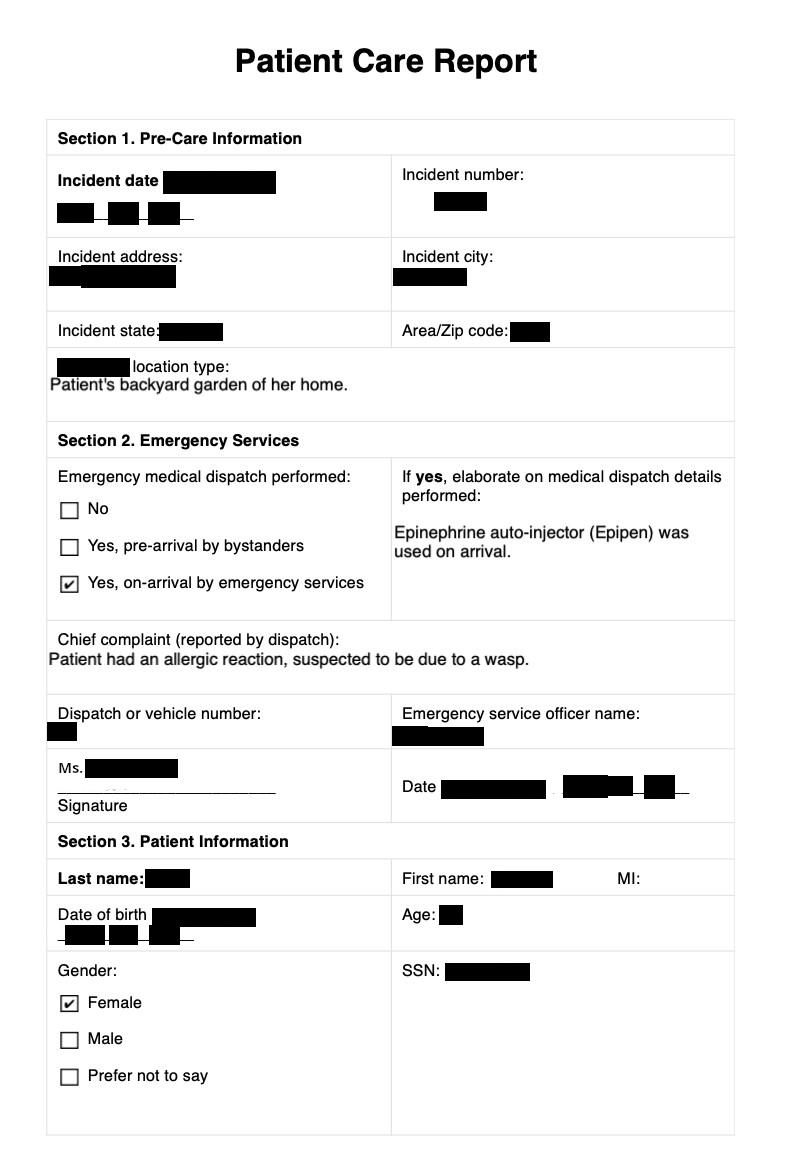

In [2]:
# Open the output image file
image = Image.open('images/output_ocr_deid.jpg')  # Replace with the path to your image file

# Display the output image
display(image)